In [1]:
import glob
import pandas as pd
import datetime

import matplotlib.pyplot as plt

from matplotlib import font_manager,rc
font_location = "C:\Windows\Fonts\malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)
plt.rcParams['axes.unicode_minus'] = False

In [2]:
##### 날씨데이터
weather = pd.read_csv('weather_data.csv',encoding='utf-8')
##### 따릉이데이터
bike = pd.read_csv('따릉이22년통합data.csv',encoding='cp949')

C:\Users\Catle_min\AppData\Local\Temp\ipykernel_4104\701428490.py:4: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  bike = pd.read_csv('따릉이22년통합data.csv',encoding='cp949')


In [3]:
bike = bike[bike['시작대여소ID'] == 'ST-2760']

In [4]:
idx=bike[bike['기준일자']=='기준일자'].index
bike.drop(idx,inplace=True)
idx=bike[bike['시작대여소ID']=='시작대여소ID'].index
bike.drop(idx,inplace=True)
idx=bike[bike['전체건수']=='전체건수'].index
bike.drop(idx,inplace=True)

In [5]:
bike['날짜'] = pd.to_datetime(bike['기준일자'].astype(str))
bike['전체건수']=bike['전체건수'].astype('int64')

In [6]:
bike=bike[['날짜','전체건수']]

In [7]:
bike.shape

(62815, 2)

In [8]:
weather.columns

Index(['Unnamed: 0', '날짜', '최고기온(℃)', '최저기온(℃)', '강수량(mm)'], dtype='object')

In [9]:
weather=weather[['날짜','최고기온(℃)', '최저기온(℃)', '강수량(mm)']]

In [10]:
bike=bike.groupby('날짜').sum(numeric_only=False)

In [11]:
bike = bike.reset_index()

In [12]:
bike['날짜']=bike['날짜'].astype('str')

In [13]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      337 non-null    object
 1   전체건수    337 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.4+ KB


In [14]:
data = pd.merge(bike, weather, left_on='날짜', right_on='날짜', how='inner')

In [15]:
data.columns

Index(['날짜', '전체건수', '최고기온(℃)', '최저기온(℃)', '강수량(mm)'], dtype='object')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337 entries, 0 to 336
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       337 non-null    object 
 1   전체건수     337 non-null    int64  
 2   최고기온(℃)  337 non-null    float64
 3   최저기온(℃)  336 non-null    float64
 4   강수량(mm)  337 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 15.8+ KB


In [17]:
data.dropna(axis=0, how='any', subset=None, inplace=False)

,날짜,전체건수,최고기온(℃),최저기온(℃),강수량(mm)
0,2022-01-01,60,2.3,-10.2,0.0
1,2022-01-02,60,3.0,-5.2,0.3
2,2022-01-03,94,2.5,-8.0,0.0
3,2022-01-04,88,1.0,-5.6,0.0
4,2022-01-05,130,1.9,-7.8,0.0
...,...,...,...,...,...
332,2022-12-27,180,3.3,-7.3,0.0
333,2022-12-28,170,0.1,-6.0,0.1
334,2022-12-29,178,2.1,-7.8,0.0
335,2022-12-30,134,2.3,-4.4,0.0


In [18]:
data=data[['날짜', '전체건수', '최고기온(℃)', '최저기온(℃)', '강수량(mm)']]

In [19]:
########## 다변량시계열예측
# import logging
from neuralprophet import NeuralProphet, set_log_level
# import plotly.express as px
set_log_level("ERROR")

# col_lst = ['최고기온(℃)','최저기온(℃)','강수량(mm)']
# col_lst = ['최고기온(℃)','최저기온(℃)','강수량(mm)']
col_lst = ['최고기온(℃)', '최저기온(℃)', '강수량(mm)']
data_f = data.rename(columns={"날짜":"ds","전체건수":"y"})

C:\ProgramData\Anaconda3\lib\site-packages\plotly_resampler\aggregation\aggregators.py:25: UserWarning: Could not import lttbc; will use a (slower) python alternative.
  warnings.warn("Could not import lttbc; will use a (slower) python alternative.")


In [20]:
data_f['ds']=data_f['ds'].astype('str')

In [21]:
#2022년도의 데이터 중 결측값이 존재하여 결측값이 없는 08월02까지 데이터를 잘라주어 진행하였다.
cutoff = "2022-08-02"
data_f=data_f[data_f['ds']<=cutoff]

In [22]:
cutoff = "2022-07-01" #데이터분할
#특정기간 전을 train set으로 사용 
train = data_f[data_f['ds']<cutoff]
test = data_f[data_f['ds']>=cutoff]

In [23]:
data_f.columns

Index(['ds', 'y', '최고기온(℃)', '최저기온(℃)', '강수량(mm)'], dtype='object')

In [24]:
data_f.shape

(214, 5)

In [25]:
data_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 0 to 213
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ds       214 non-null    object 
 1   y        214 non-null    int64  
 2   최고기온(℃)  214 non-null    float64
 3   최저기온(℃)  214 non-null    float64
 4   강수량(mm)  214 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 10.0+ KB


In [26]:
test.shape

(33, 5)

In [27]:
#튜닝
m = NeuralProphet(
            n_forecasts=33,  
            n_lags=1, #변수가 얼마뒤의 예측변수에 영향을 줄지(60분뒤)
            weekly_seasonality=True, #주간 계절성 설정
            daily_seasonality=True, #일간 계절성 설정
            d_hidden=128, #은닉층 뉴런 설정
            learning_rate=0.01, #학습률 설정
            batch_size=30, #배치 사이즈 설정
            epochs=200, #학습 횟수
#             drop_missing=True
    )
# #독립 변인(변수)추가 및 정규화
m = m.add_lagged_regressor(names=col_lst, normalize="minmax") 

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

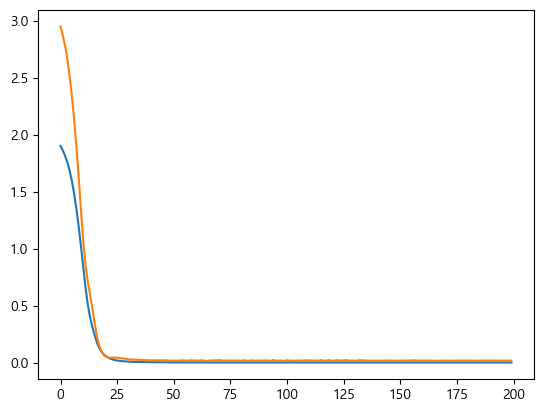

In [28]:
#학습수행
metrics = m.fit(train, freq='h', validation_df=test, progress='plot')
#mae, mae_val

Predicting: 143it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - C:\ProgramData\Anaconda3\lib\site-packages\neuralprophet\forecaster.py:3108: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_forecast[name] = yhat

WARNING - (py.warnings._showwarnmsg) - C:\ProgramData\Anaconda3\lib\site-packages\neuralprophet\forecaster.py:3108: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_forecast[name] = yhat

WARNING - (py.warnings._showwarnmsg) - C:\ProgramData\Anaconda3\lib\site-packages\neuralprophet\forecaster.py:3108: PerformanceWarning: DataFrame is highly fr

WARNING - (py.warnings._showwarnmsg) - C:\ProgramData\Anaconda3\lib\site-packages\neuralprophet\forecaster.py:3108: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_forecast[name] = yhat

WARNING - (py.warnings._showwarnmsg) - C:\ProgramData\Anaconda3\lib\site-packages\neuralprophet\forecaster.py:3108: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_forecast[name] = yhat

WARNING - (py.warnings._showwarnmsg) - C:\ProgramData\Anaconda3\lib\site-packages\neuralprophet\forecaster.py:3108: PerformanceWarning: DataFrame is highly fr

WARNING - (py.warnings._showwarnmsg) - C:\ProgramData\Anaconda3\lib\site-packages\neuralprophet\forecaster.py:3108: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_forecast[name] = yhat

WARNING - (py.warnings._showwarnmsg) - C:\ProgramData\Anaconda3\lib\site-packages\neuralprophet\forecaster.py:3108: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_forecast[name] = yhat

WARNING - (py.warnings._showwarnmsg) - C:\ProgramData\Anaconda3\lib\site-packages\neuralprophet\forecaster.py:3108: PerformanceWarning: DataFrame is highly fr

WARNING - (py.warnings._showwarnmsg) - C:\ProgramData\Anaconda3\lib\site-packages\neuralprophet\forecaster.py:3108: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_forecast[name] = yhat

WARNING - (py.warnings._showwarnmsg) - C:\ProgramData\Anaconda3\lib\site-packages\neuralprophet\forecaster.py:3108: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_forecast[name] = yhat

WARNING - (py.warnings._showwarnmsg) - C:\ProgramData\Anaconda3\lib\site-packages\neuralprophet\forecaster.py:3108: PerformanceWarning: DataFrame is highly fr

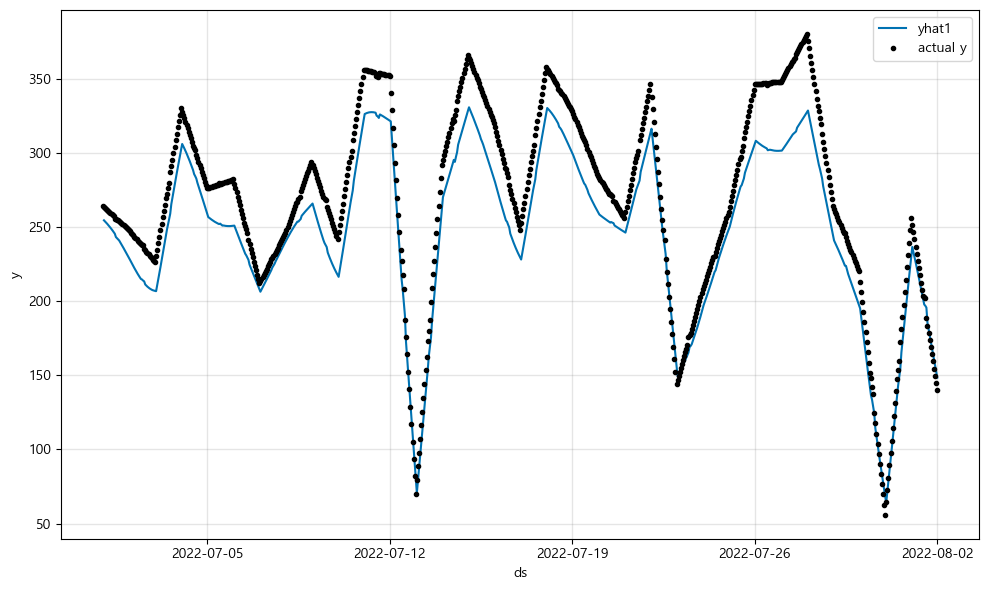

In [29]:
#yhat1과 실제값 시각화"
forecast = m.predict(test)
fig = m.plot(forecast[['ds', 'y', 'yhat1']])

In [31]:
print("== Multivariate model ==")
print("Loss: ",metrics.Loss.tail(1).item())
print("MAE(Train): ", metrics.MAE.tail(1).item())
print("MAE(Test): ", metrics.MAE_val.tail(1).item())

== Multivariate model ==
Loss:  0.003129260614514351
MAE(Train):  15.82169246673584
MAE(Test):  42.07854080200195
